# 10.05 ~ 10.09 과제
### 1. 2015 ~ 2022 페런트레이스 결과 도출
- SSG wire to wire 우승 분석하기 위해서 반드시 필요함
- 역대 다른 우승팀들의 우승과정은 어떠했는지 대조하면서 분석할 예정임.
- 2015년으로 잡은 이유: 10구단 창단 후 일정 변화가 잦았기도 했고, 무엇보다 경기수가 10개 구단을 기점으로 144경기로 고정하여 진행되었기 때문에 2015년으로 잡기로 함
### 2. 2022 시즌 SSG 선수들의 일자별 경기 결과 도출하기
- 구체적일수록 좋음
- 구체적인 것의 기준이, 타석, 결과, 당시 상황(1사 1,2루였다 혹은 2사 만루였다 이런 식으로)을 설명할 수 있는 데이터를 얻어낼 것

## 1. 2015 ~ 2022 페런트레이스 결과 도출
- 고민거리: 개막일정을 리스트로 적어놓는게 맞나? 아니면 개막전이라는 걸 확인시킬 다른 방법이 없는건가?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import natsort
from datetime import date, datetime
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

In [9]:
year_list = [int(year) for year in range(2015, 2023)]
team_list = ["LG", "SSG", "KT", "NC", "두산", "키움", "한화", "KIA", "삼성", "롯데"]
color_list=["#DB1916", "#fff000", "#000000", "#C79F79", "#000066", "#660066", "#FF7F00", "#ff0000","#0000ff", "#330066"]
open_race = {
    2015:(3,28),
    2016:(4,1),
    2017:(3,31),
    2018:(3,24),
    2019:(3,23),
    2020:(5,5),
    2021:(4,3),
    2022:(4,2)
}

close_race = {
    2015:(10,6), #지상파 중계를 안하는바람에 실수
    2016:(10,9),
    2017:(10,3),
    2018:(10,14),
    2019:(10,1),
    2020:(10,31),
    2021:(10,31), #타이브레이크. 정규시즌은 1030
    2022:(10,10)
}

In [10]:
for year in year_list:
    #os.makedirs("./re_date/{}".format(year)) #있으면 만들어라 하고 없으면 만들지 마라고 할 수 있는데, 까먹었다 ㅋㅋㅋㅋㅋㅋㅋㅋ ㅈㅅ;;
    op_mon, op_day = open_race[year]
    cl_mon, cl_day = close_race[year]
    month_list = [int(month) for month in range(op_mon, cl_mon+1)]
    print(year)
    for m, month in enumerate(month_list):
        url = "https://sports.news.naver.com/kbaseball/schedule/index?month={}&year={}".format(month,year)
        df = pd.read_html(url)
        for d in range(1, len(df)-1):
            if df[d][2][0] == "프로야구 경기가 없습니다.":
                continue
            if (m==0 and d<op_day):
                continue
            if (m==len(month_list)-1 and d>cl_day):
                break
            remain = df[d].loc[:, [0,1,2,3,4,5]]
            remain.rename(columns={0:"일자", 1:"시각", 2:"경기결과", 4:"중계사", 5:"구장"} , inplace=True)
            text = remain["일자"][0].split()[0]
            remain["일자"] = text
            remain.to_csv("./re_date/{}/{}.csv".format(year, text), header=True, encoding='UTF-8', index=False)
        print(month, "완료")

2015
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2016
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2017
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2018
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2019
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2020
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2021
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2022
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료


In [11]:
init_data = [0,0,0,0,0,0,0]
records = []

In [12]:
for year in year_list:
    KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점", "득실차"], index=team_list)
    #os.makedirs("./re_rank/{}".format(year))
    for team in team_list:
        KBO_team.loc[team] = init_data

    order_list=os.listdir("./re_date/{}".format(year))
    sorted_list = natsort.natsorted(order_list)

    for file in sorted_list:
        data = pd.read_csv("./re_date/{}/{}".format(year, file))
        for i in data.index:
            line = data.loc[i, :]

            if len(line[2].split(":")) == 1:
                continue

            away, home = line[2].split(":")
            home = home.split()
            away = away.split()
            h_score, h_team = home
            a_team, a_score = away

            h_team = h_team.upper()
            a_team = a_team.upper()

            if h_team == "나눔" or a_team == "나눔":
                continue
            if h_team == "SK":
                h_team = "SSG"
            elif a_team == "SK":
                a_team = "SSG"
            if h_team == "넥센":
                h_team = "키움"
            elif a_team == "넥센":
                a_team = "키움"


            h_score = int(h_score)
            a_score = int(a_score)

            KBO_team.loc[h_team, ["득점"]] += h_score
            KBO_team.loc[h_team, ["실점"]] += a_score
            KBO_team.loc[a_team, ["득점"]] += a_score
            KBO_team.loc[a_team, ["실점"]] += h_score

            #리팩토링은 항상 모두 완료하고나서 할 것
            if h_score > a_score: #홈팀 승리
                KBO_team.loc[h_team, ["승리"]] +=1
                KBO_team.loc[a_team, ["패배"]] +=1
            elif h_score < a_score:
                KBO_team.loc[a_team, ["승리"]] +=1
                KBO_team.loc[h_team, ["패배"]] +=1
            else:
                KBO_team.loc[h_team, ["무승부"]] +=1
                KBO_team.loc[a_team, ["무승부"]] +=1

            KBO_team["득실차"] = KBO_team["득점"] - KBO_team["실점"]
            KBO_team["경기수"] = KBO_team["승리"] + KBO_team["패배"] + KBO_team["무승부"]
            KBO_team["승점"] = (144-KBO_team["경기수"])*0.5 + KBO_team["승리"] + KBO_team["무승부"]*0.5
            KBO_team["게임차"] = KBO_team["승점"][0] - KBO_team["승점"]
            KBO_team.sort_values(by="승점", inplace=True, ascending=False)
            KBO_team["순위"] = KBO_team["승점"].rank(method="min", ascending=False).astype('int')

            KBO_team.to_csv("./re_rank/{}/{}".format(year, file), header=True, encoding='UTF-8', index=True)
    kbo = pd.DataFrame(KBO_team, columns=["득점","실점","득실차","게임차"])

    records.append(kbo)

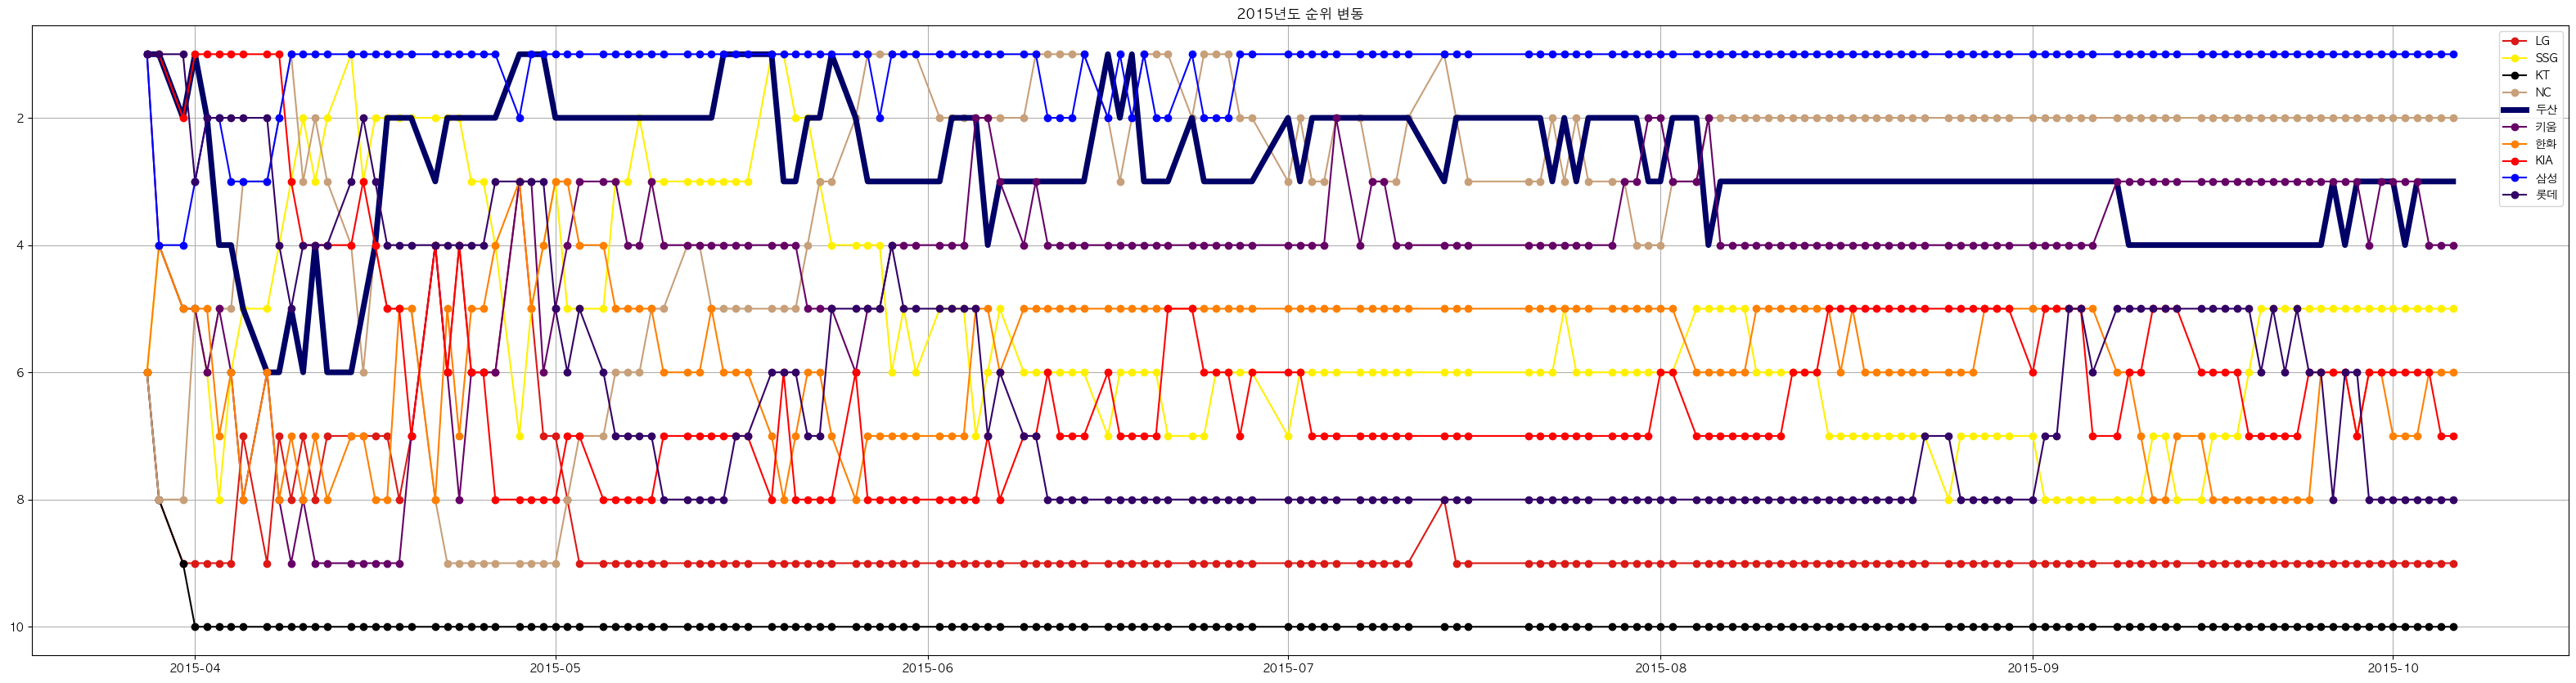

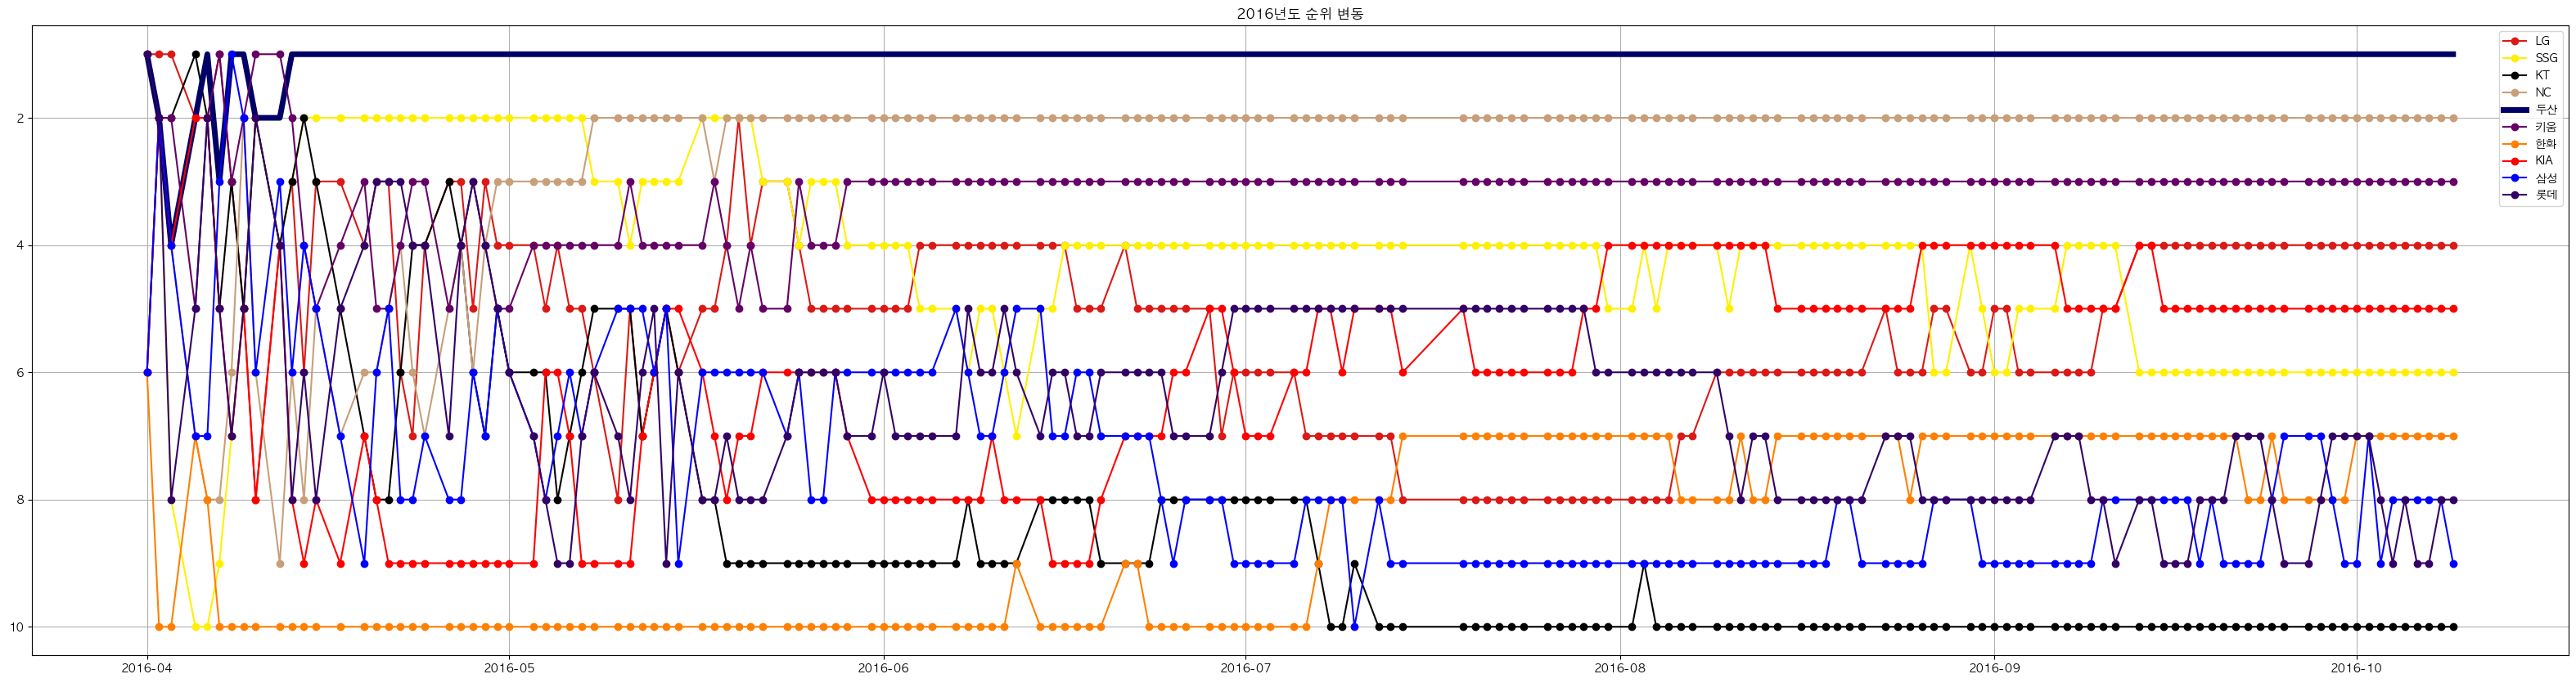

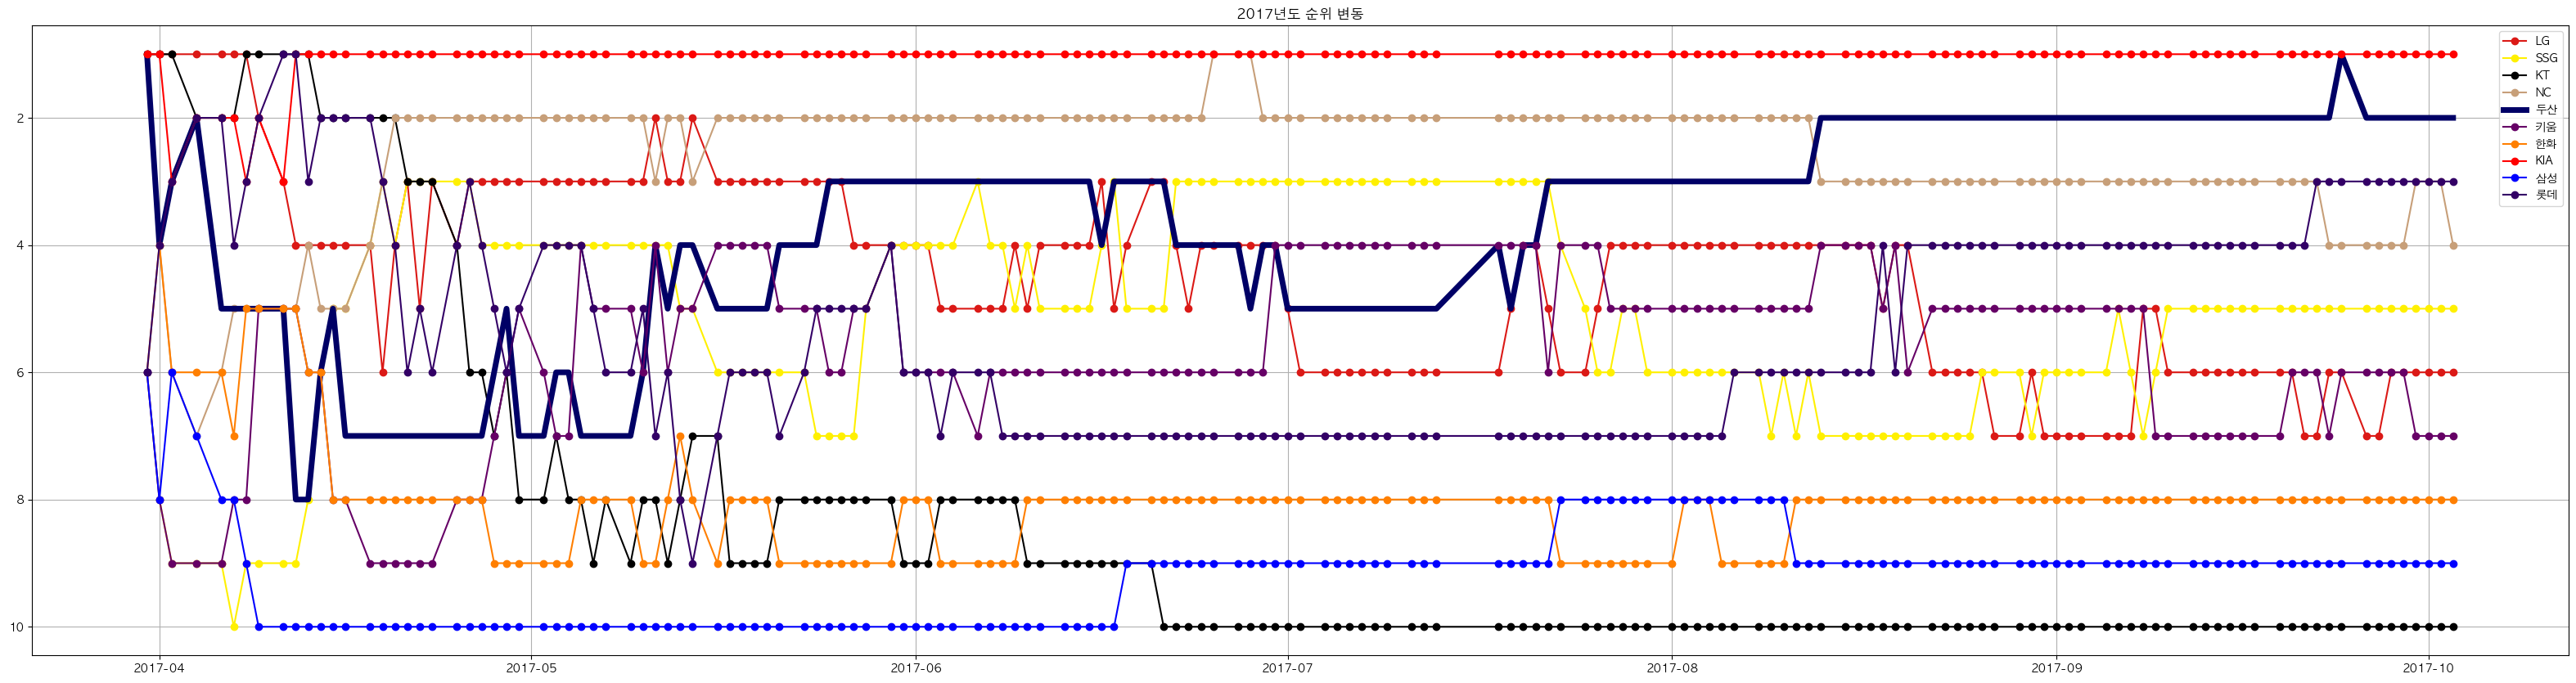

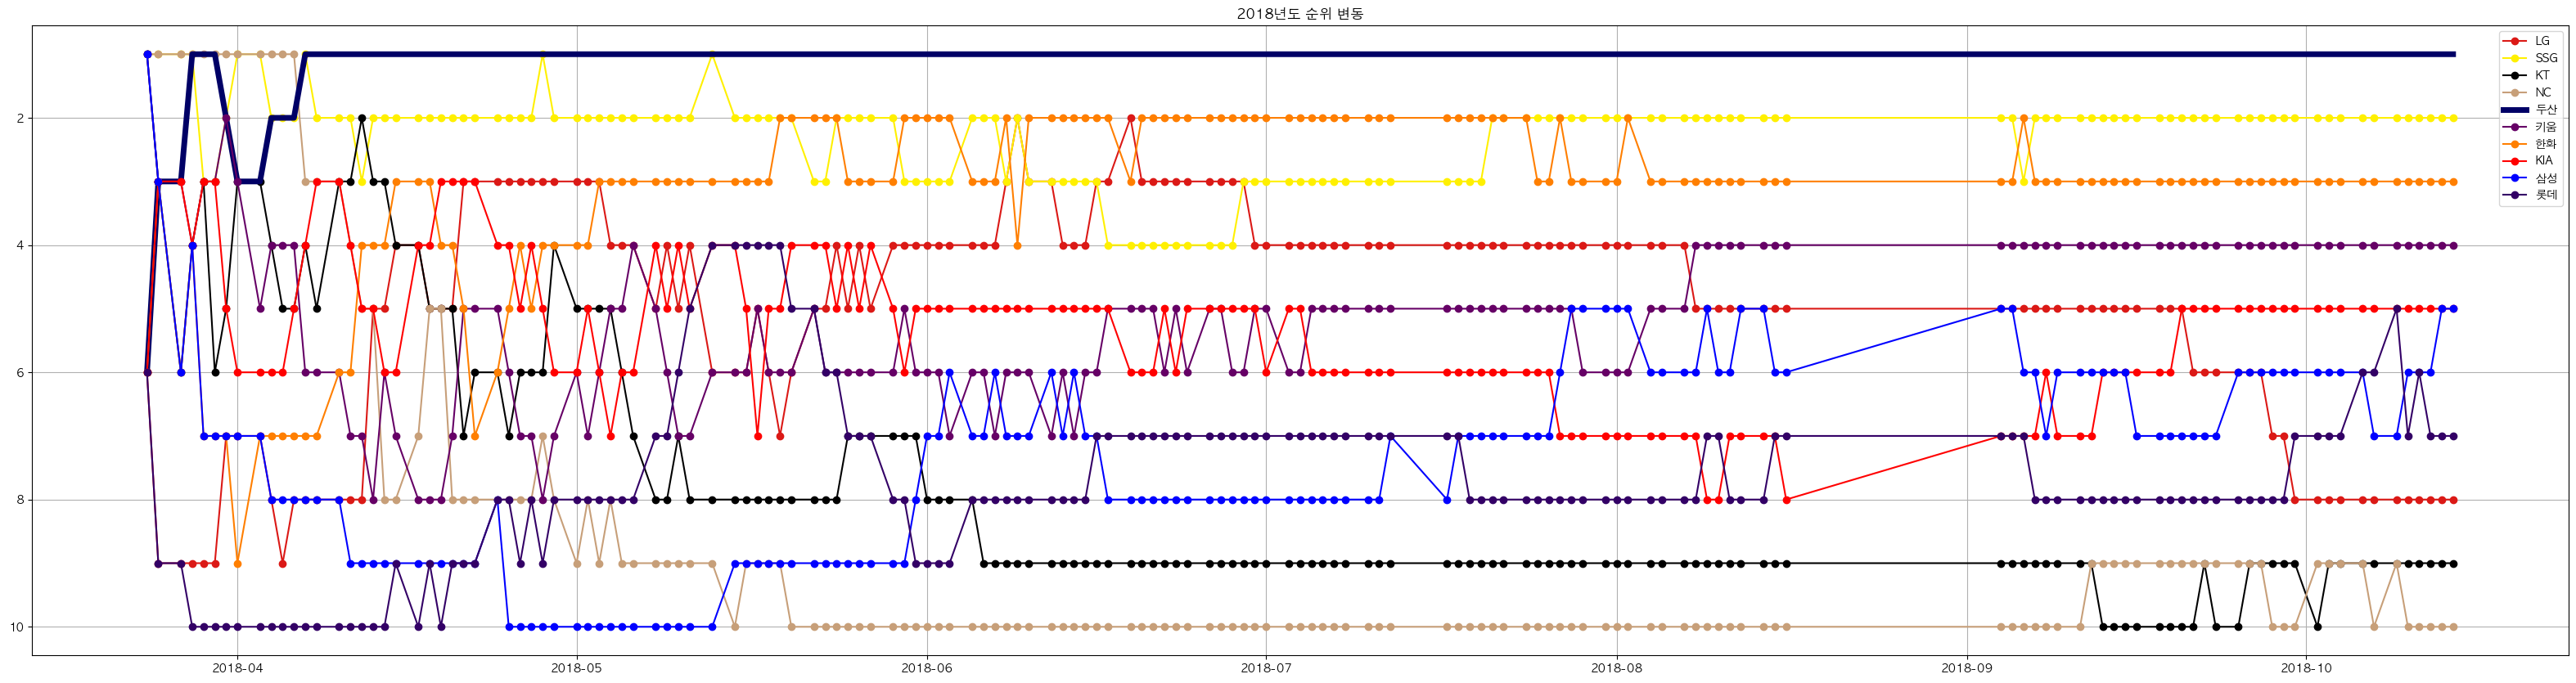

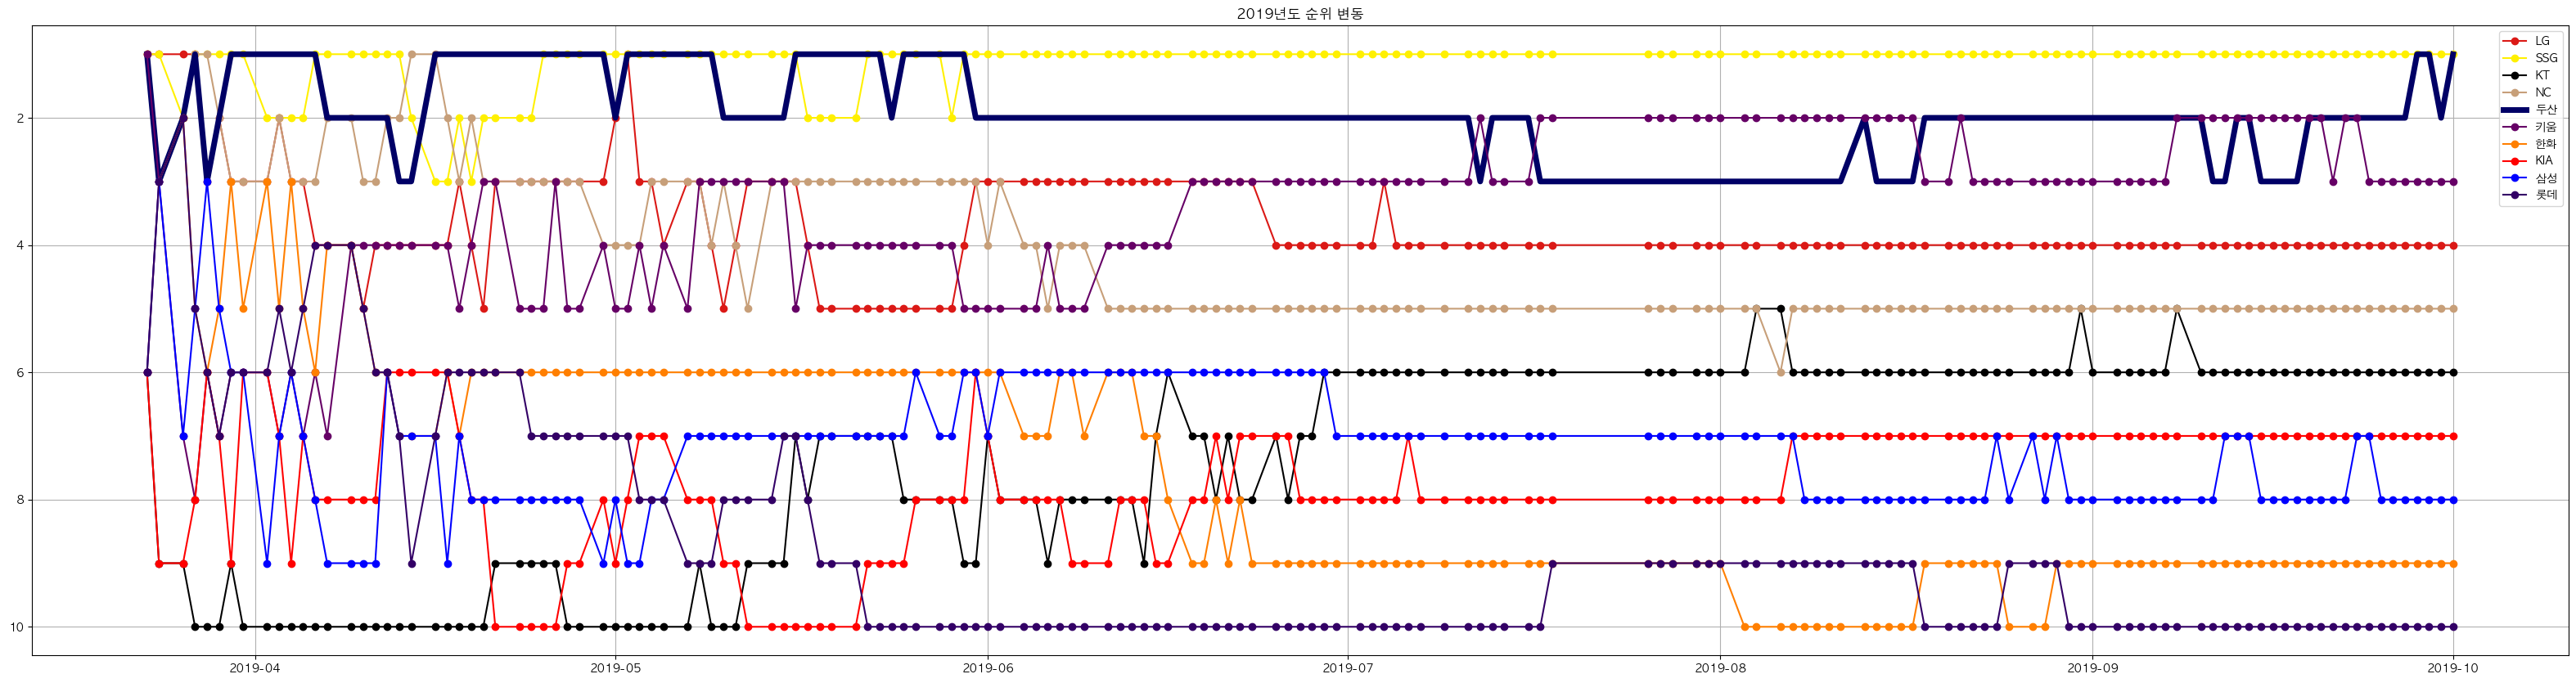

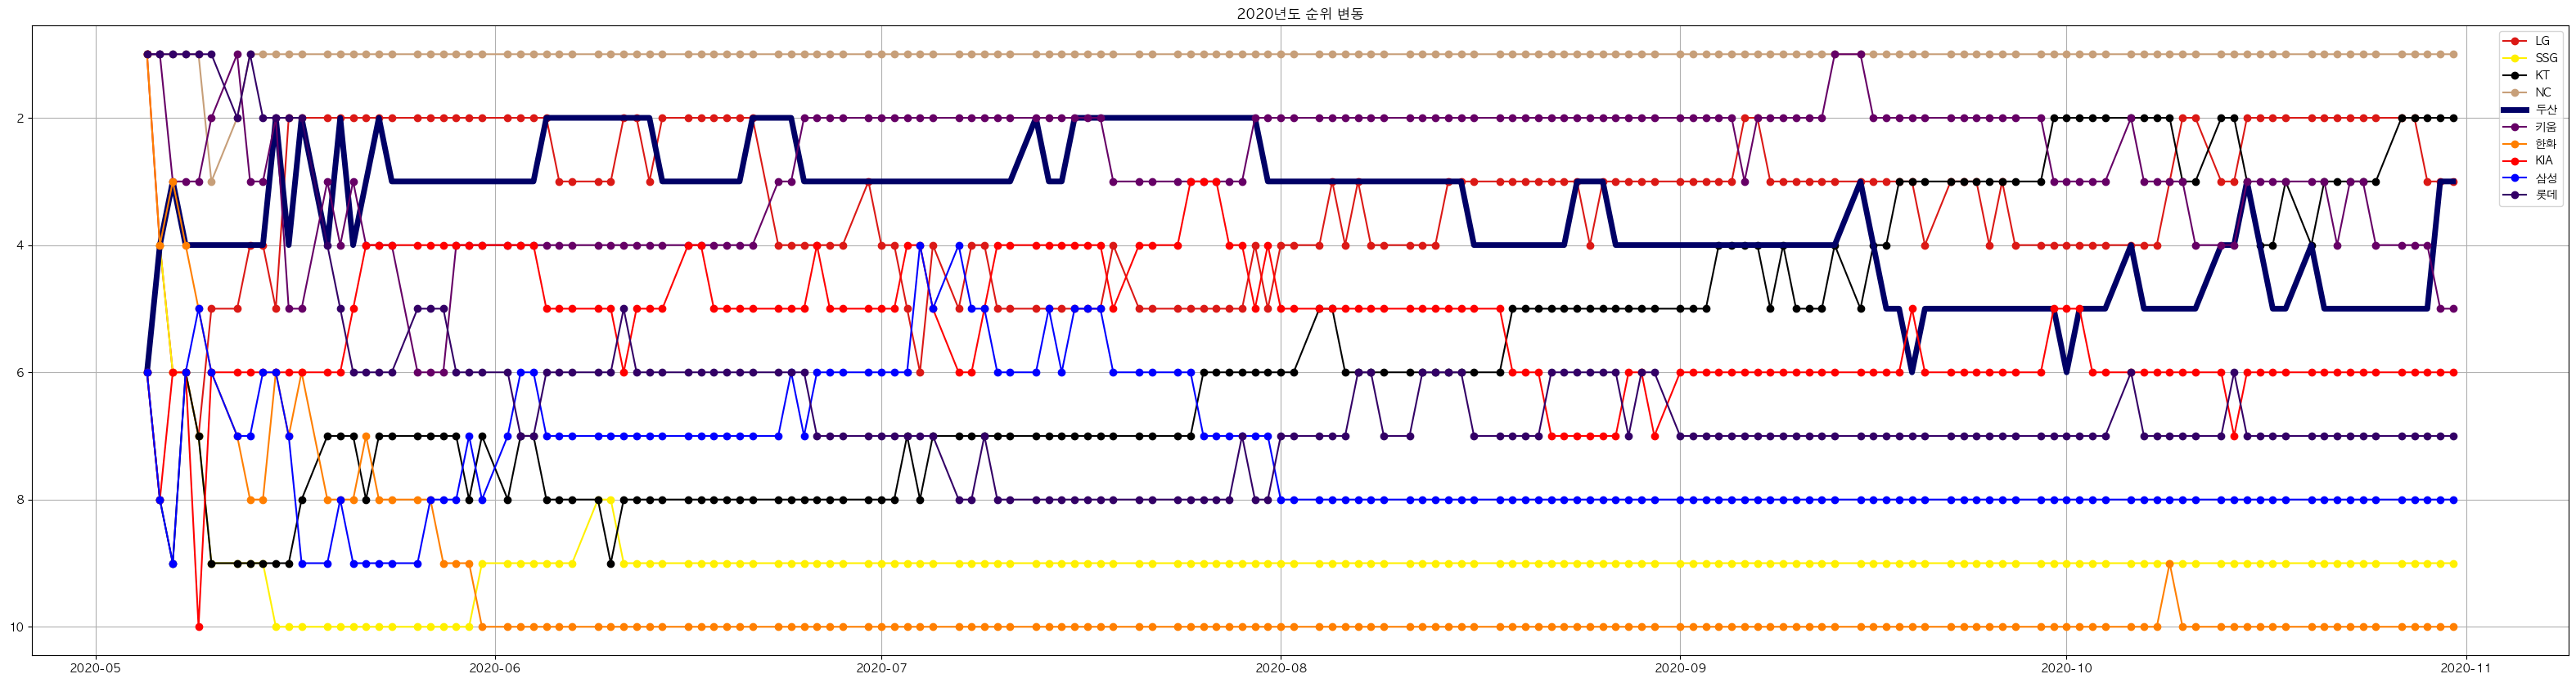

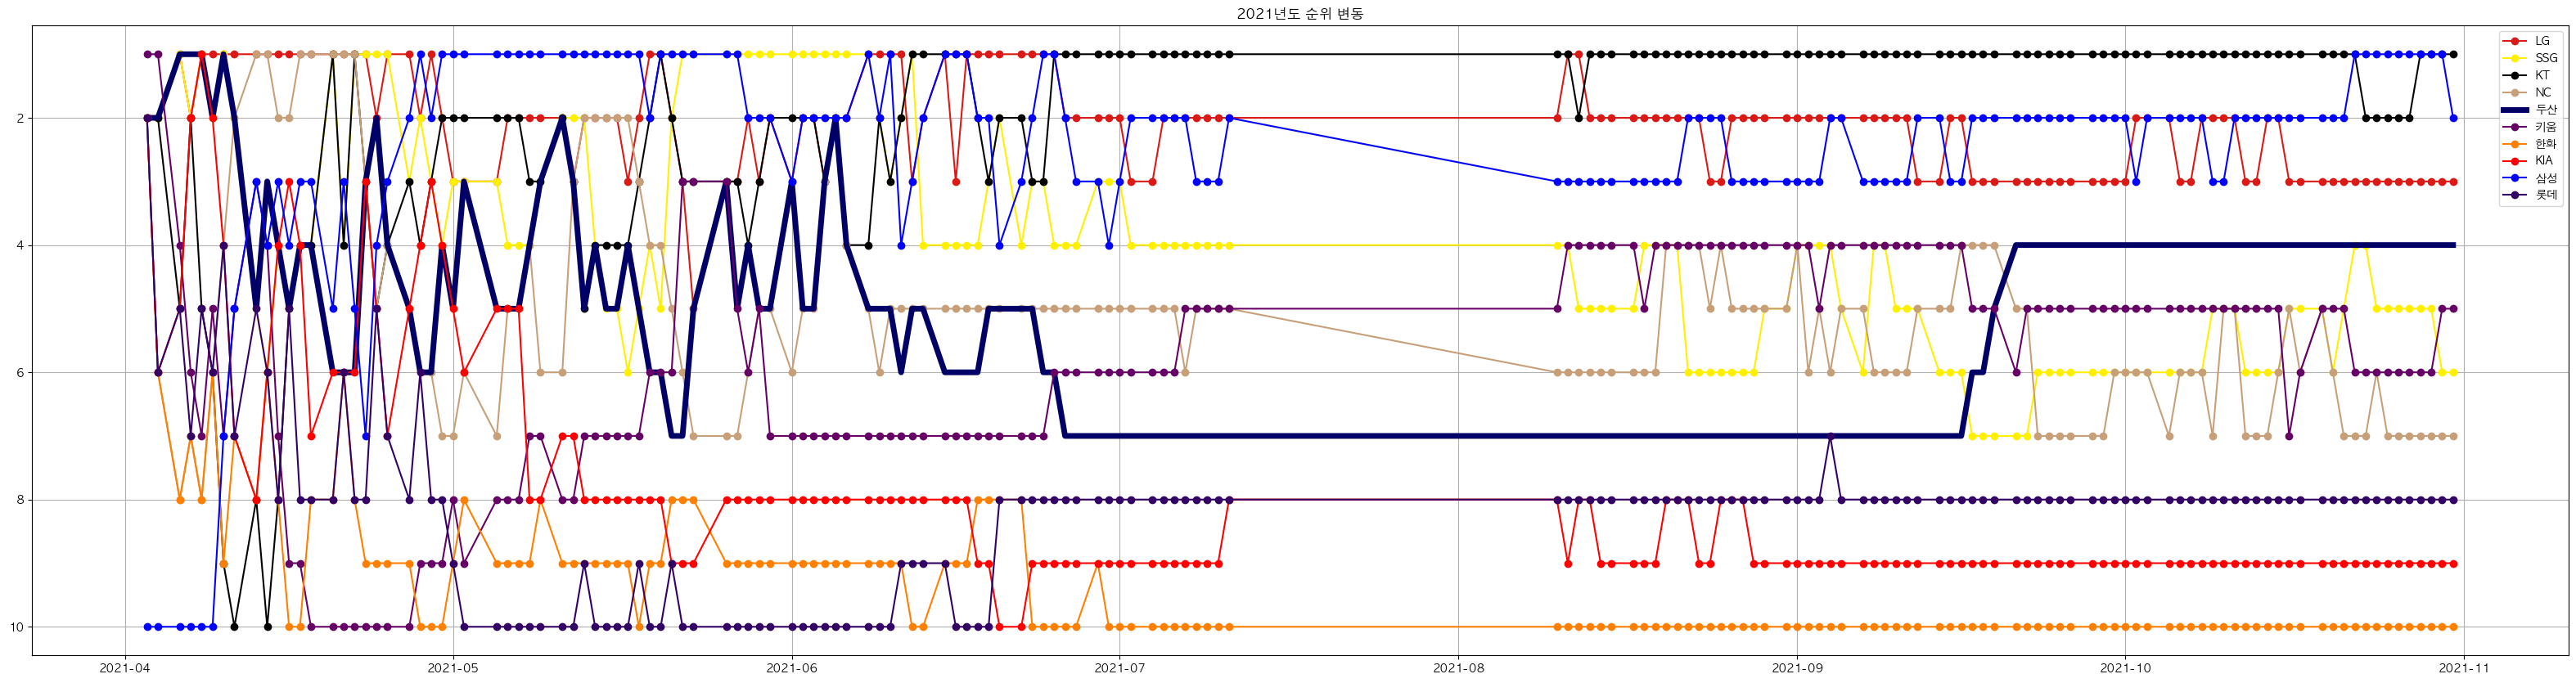

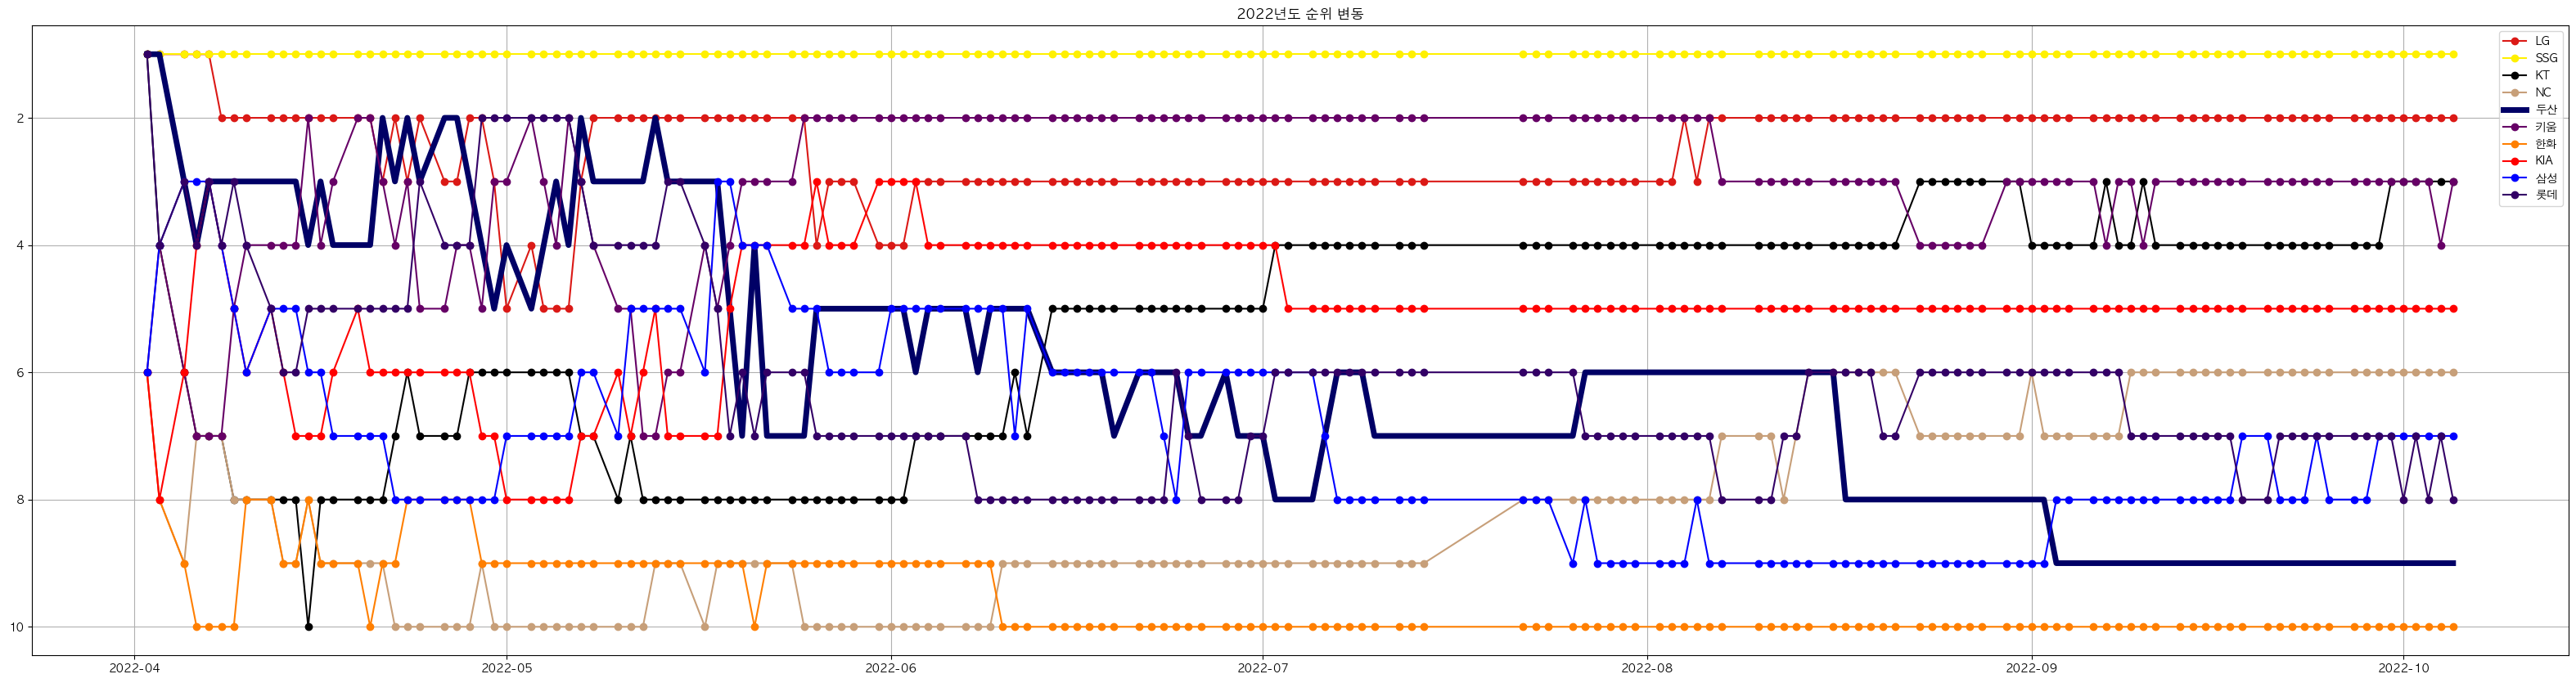

In [14]:
for year in year_list:
    rank_list = os.listdir("./re_rank/{}".format(year))
    sorted_rank = natsort.natsorted(rank_list)

    for team, color in zip(team_list, color_list):
        df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","득실차","승점", "게임차", "순위", "일자"])
        for file in sorted_rank:
            if file == '.DS_store':
                continue
            date = datetime.strptime("{}.{}".format(year, file.replace('.csv', '')), '%Y.%m.%d')
            rank_df=pd.read_csv("./re_rank/{}/{}".format(year, file), index_col=0)
            rank_df["일자"] = date

            rank_list = list(rank_df.loc[team, :])
            df_result.loc[len(df_result)] = rank_list
        plt.gcf().set_size_inches(40, 10)
        if team == "두산":
            plt.plot(df_result["일자"], df_result["순위"], label=team, color=color, linewidth=5.0)
            continue
        plt.plot(df_result["일자"], df_result["순위"], label=team, color=color, marker='o')
    plt.title("{}년도 순위 변동".format(year))
    plt.grid()
    plt.legend(loc='best')
    plt.gca().invert_yaxis()
    plt.savefig("./img/{}.png".format(year), dpi=500)
    plt.show()

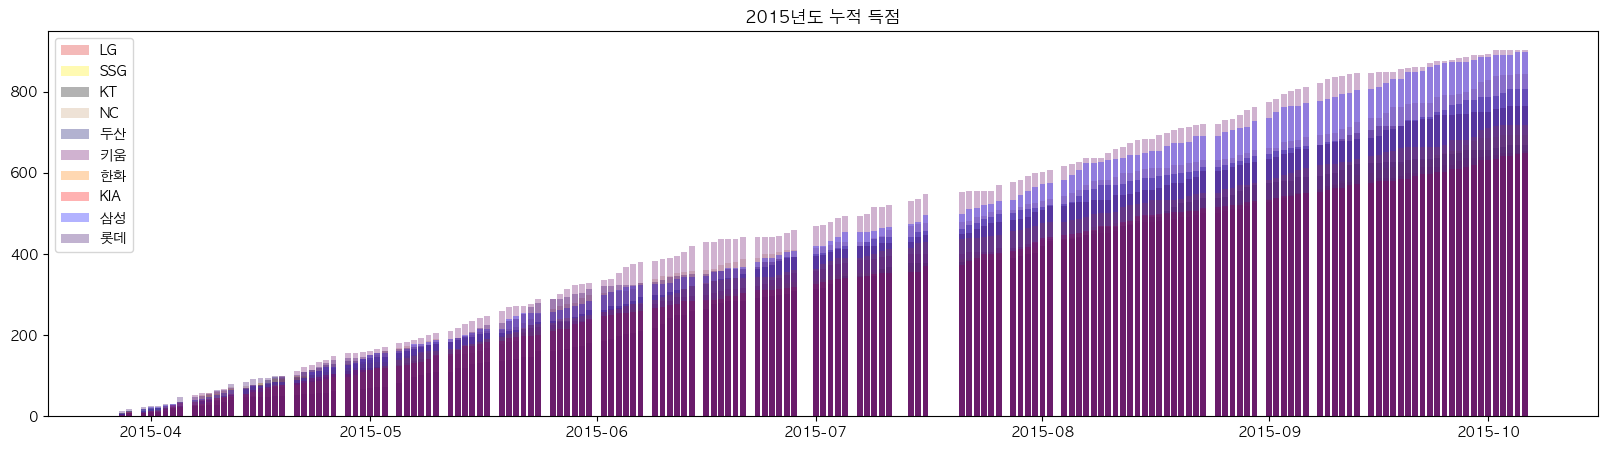

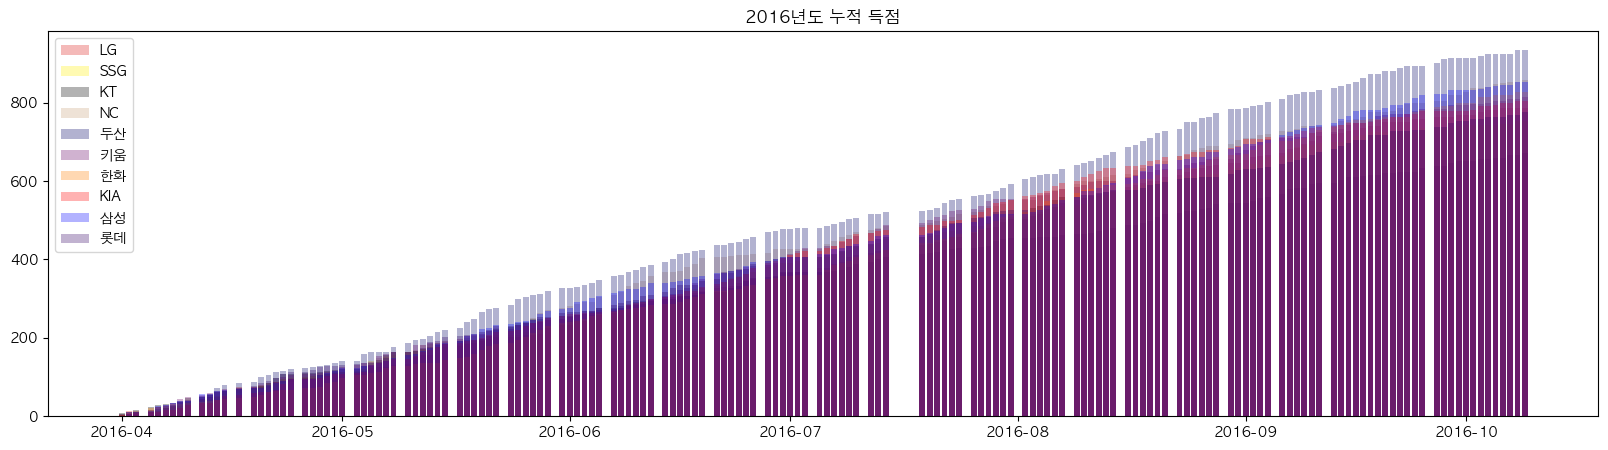

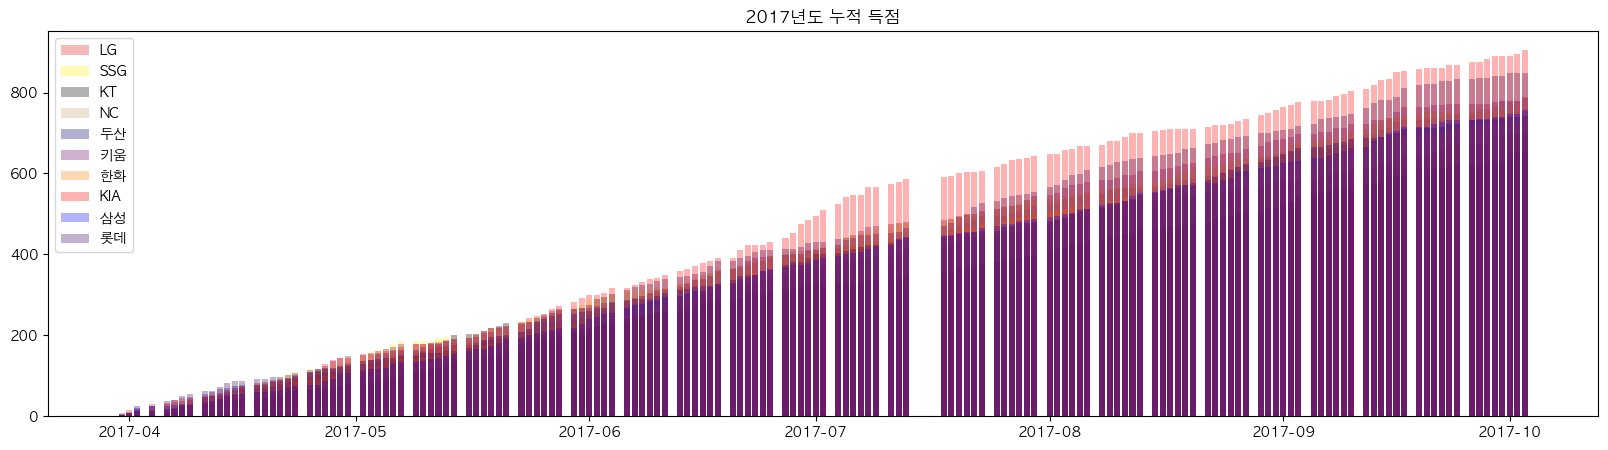

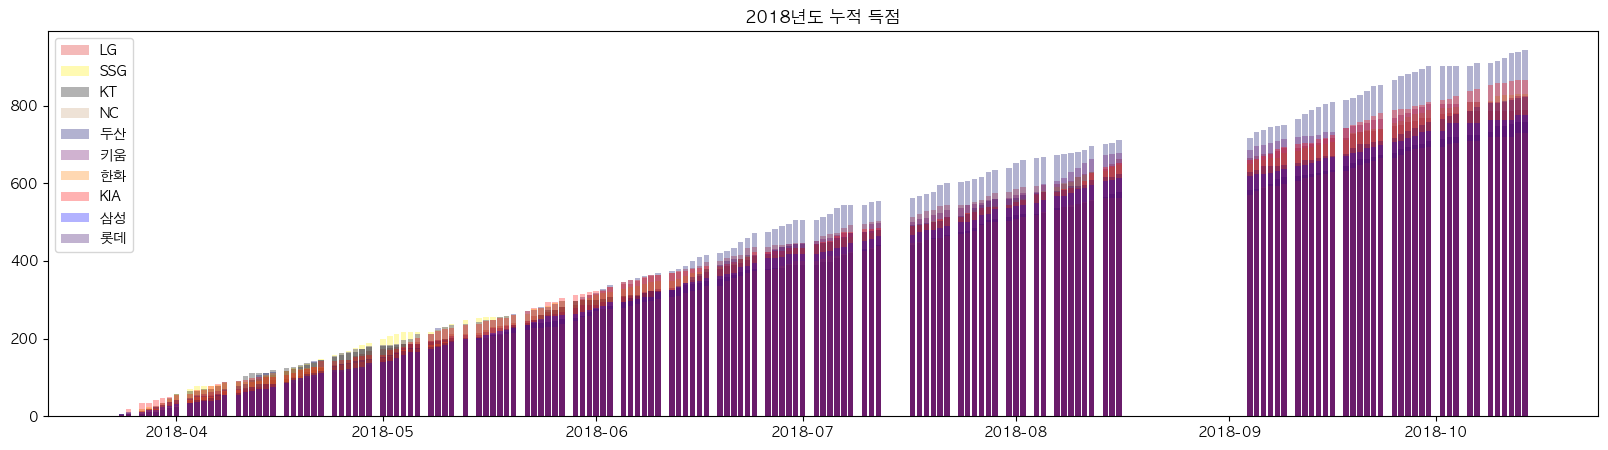

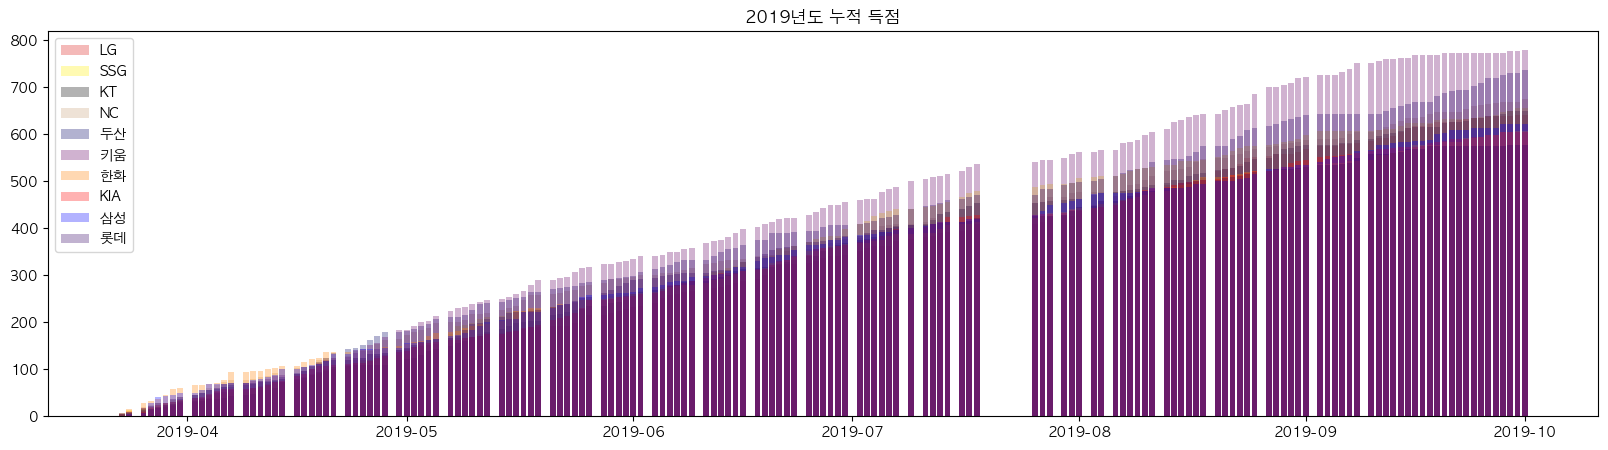

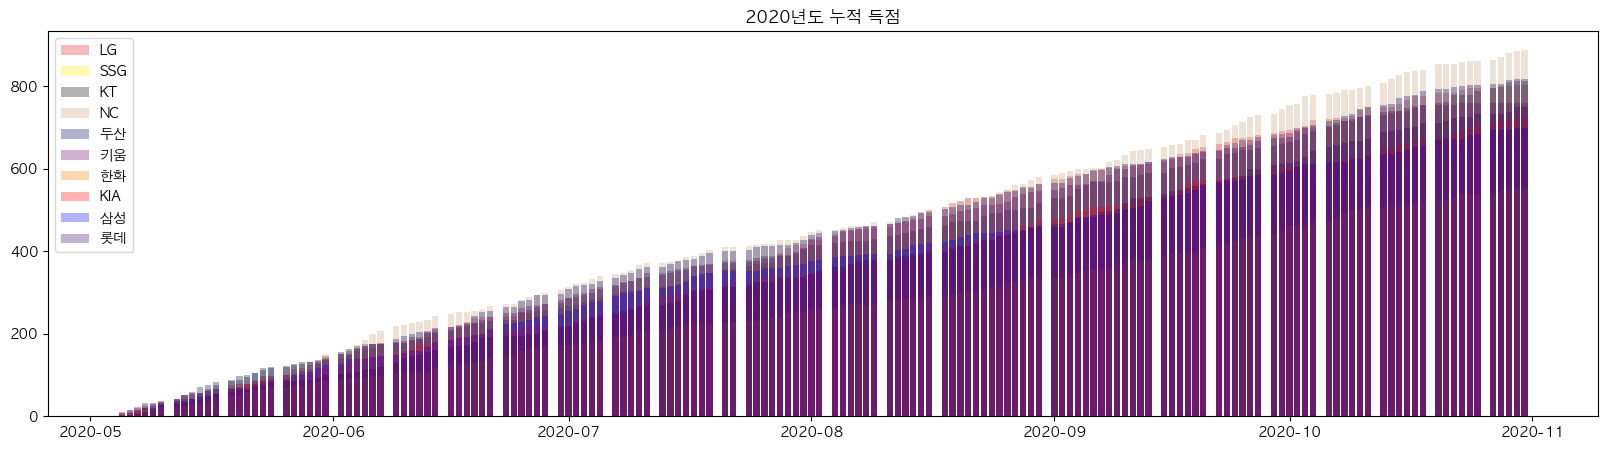

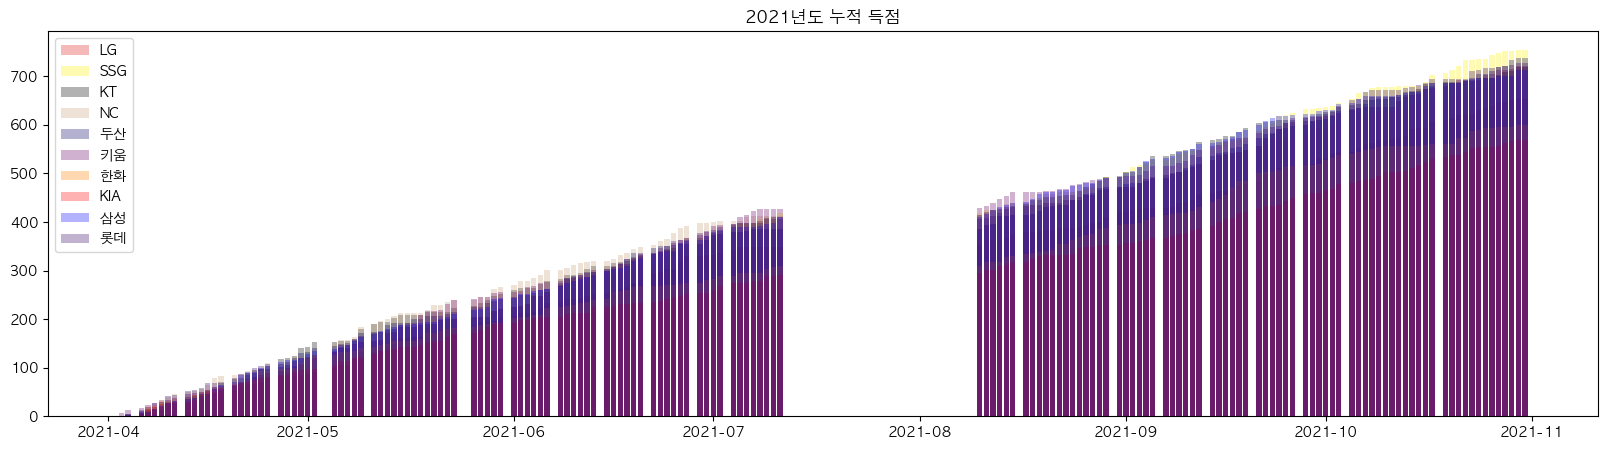

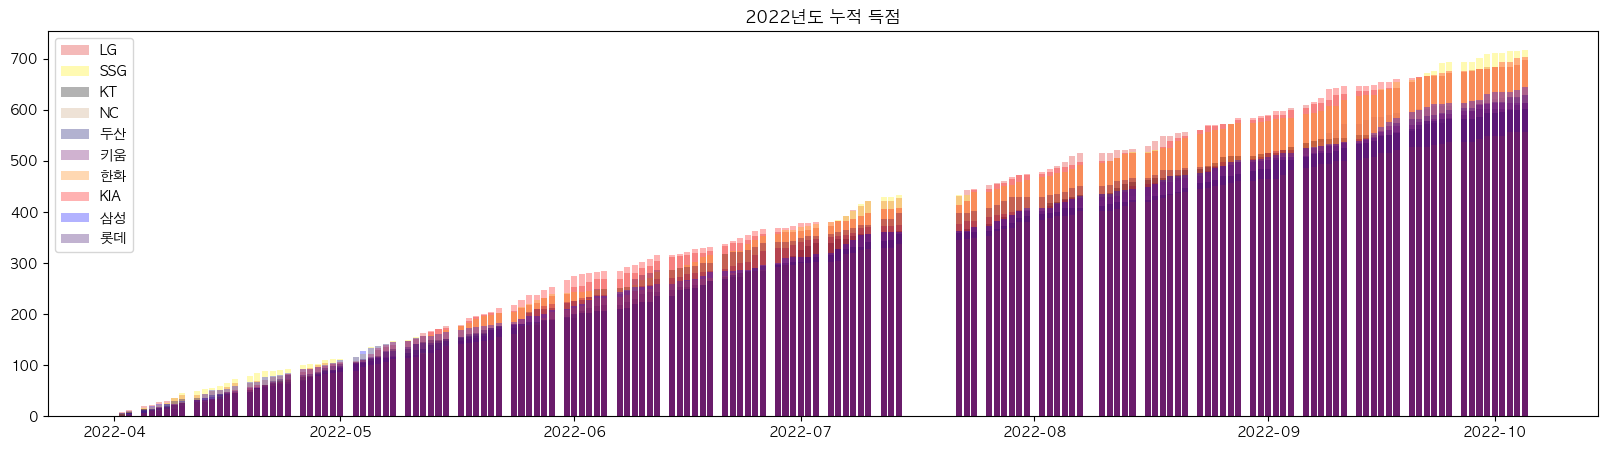

In [15]:
for year in year_list:
    rank_list = os.listdir("./re_rank/{}".format(year))
    sorted_rank = natsort.natsorted(rank_list)
    for team, color in zip(team_list, color_list):
        df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","득실차","승점", "게임차", "순위", "일자"])

        for file in sorted_rank:
            if file == ".DS_Store":
                continue
            date = datetime.strptime("{}.{}".format(year, file.replace('.csv', '')), "%Y.%m.%d")
            rank_df=pd.read_csv("./re_rank/{}/{}".format(year, file), index_col=0)
            rank_df["일자"] = date

            rank_list = list(rank_df.loc[team, :])
            df_result.loc[len(df_result)] = rank_list
        plt.gcf().set_size_inches(20, 5)
        plt.bar(df_result["일자"], df_result["득점"], label=team, color=color, alpha=0.3)
    plt.title("{}년도 누적 득점".format(year))
    plt.legend(loc='best')
    plt.savefig("./img/{}_득점.png".format(year), dpi=500)
    plt.show()

In [17]:
for year in year_list:
    rank_list = os.listdir("./re_rank/{}".format(year))
    sorted_rank = natsort.natsorted(rank_list)
    for team, color in zip(team_list, color_list):
        df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","득실차","승점", "게임차", "순위", "일자"])

        for file in sorted_rank:
            if file == ".DS_Store":
                continue
            date = datetime.strptime("{}.{}".format(year, file.replace('.csv', '')), "%Y.%m.%d")
            rank_df=pd.read_csv("./re_rank/{}/{}".format(year, file), index_col=0)
            rank_df["일자"] = date
            rank_df["득실차"] = rank_df["득점"] - rank_df["실점"]

            rank_list = list(rank_df.loc[team, :])
            df_result.loc[len(df_result)] = rank_list

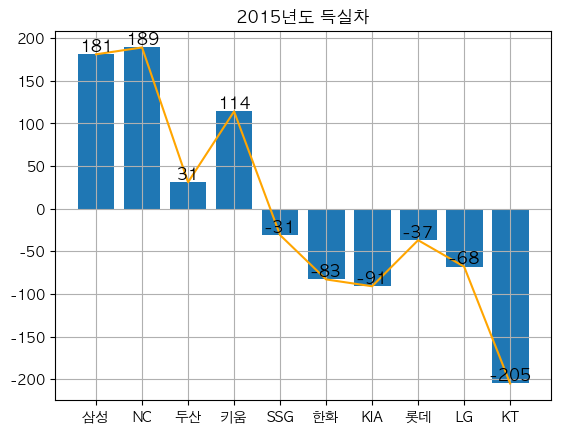

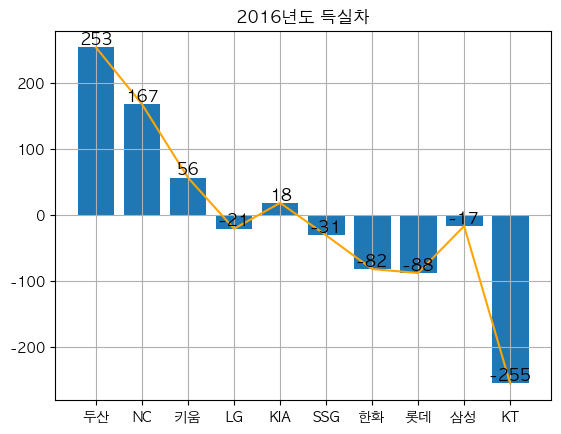

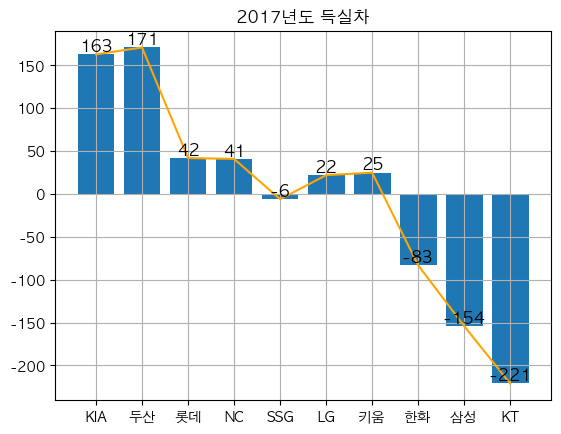

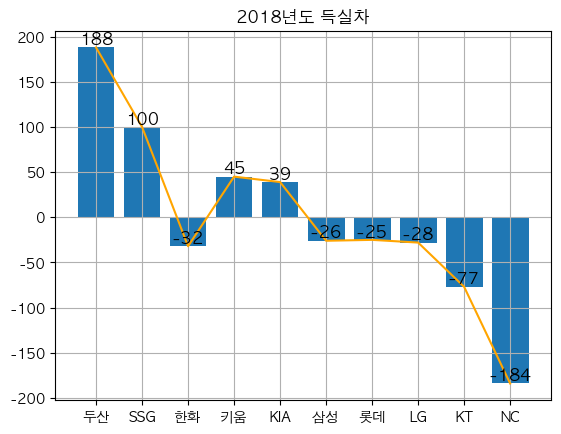

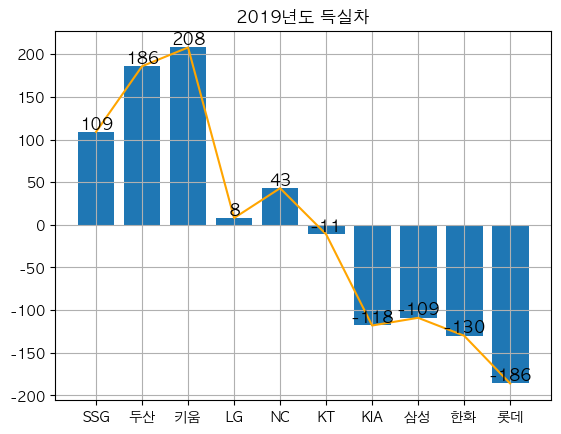

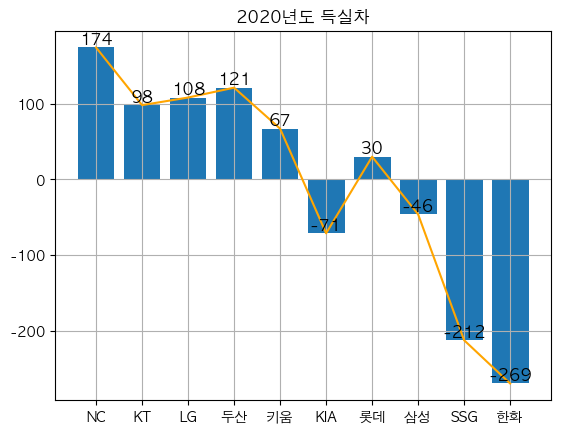

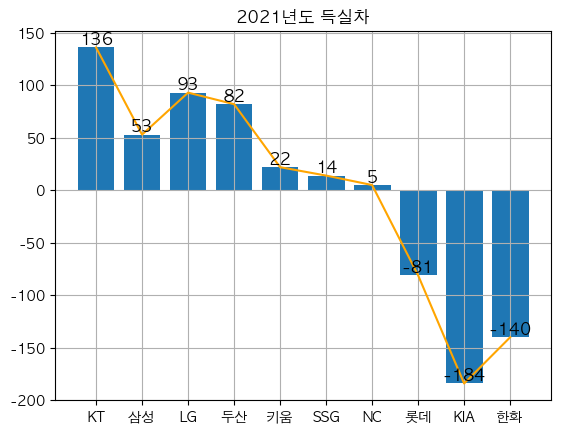

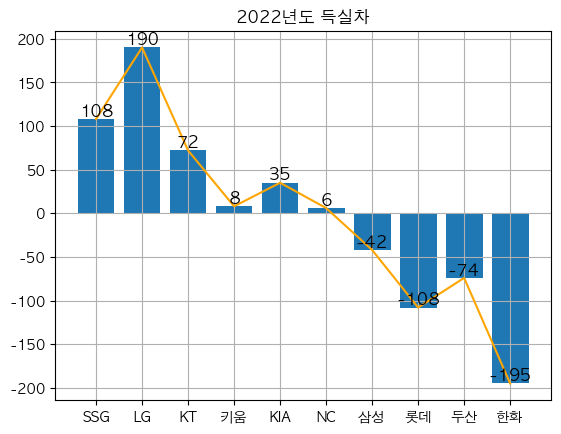

In [39]:
for i, record in enumerate(records):
    year=2015+i
    df=record
    bar = plt.bar(df.index, df["득실차"])
    plot = plt.plot(df.index, df["득실차"], color="orange")

    for rect in bar:
        height=rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, "%d"%height, ha="center", va="bottom", size=12)
    plt.title("%d년도 득실차"%(year))
    plt.grid()
    plt.savefig("./img/{}_득실차".format(year))
    plt.show()

In [42]:
for i,record in enumerate(records):
    year = 2015+i
    record = record.astype('float')
    print(year)
    display(record.describe())

2015


득점         실점         득실차        게임차
count   10.000000   10.00000   10.000000  10.000000
mean   759.800000  759.80000    0.000000  16.000000
std     98.446601   61.43072  127.622708  10.718623
min    648.000000  655.00000 -205.000000   0.000000
25%    675.750000  721.75000  -79.250000   9.125000
50%    741.000000  757.50000  -34.000000  19.000000
75%    834.750000  797.50000   93.250000  21.375000
max    904.000000  875.00000  189.000000  35.500000

2016


득점          실점         득실차        게임차
count   10.00000   10.000000   10.000000  10.000000
mean   807.40000  807.400000    0.000000  21.500000
std     69.76341   84.744321  140.056338  10.967123
min    672.00000  682.000000 -255.000000   0.000000
25%    779.25000  763.750000  -69.250000  17.375000
50%    808.00000  796.000000  -19.000000  23.750000
75%    845.50000  868.000000   46.500000  27.125000
max    935.00000  927.000000  253.000000  39.500000

2017


득점          실점         득실차        게임차
count   10.000000   10.000000   10.000000  10.000000
mean   768.200000  768.200000    0.000000  15.500000
std     71.223904   79.482772  124.653297  12.420861
min    655.000000  677.000000 -221.000000   0.000000
25%    738.500000  711.500000  -63.750000   6.625000
50%    759.000000  754.500000   23.500000  14.500000
75%    788.250000  806.750000   41.750000  23.500000
max    906.000000  911.000000  171.000000  37.500000

2018


득점          실점         득실차        게임차
count   10.00000   10.000000   10.000000  10.000000
mean   799.40000  799.400000    0.000000  21.000000
std     77.51301   40.877051  100.986248   9.780934
min    660.00000  729.000000 -184.000000   0.000000
25%    761.75000  765.750000  -31.000000  16.500000
50%    804.50000  809.000000  -25.500000  23.000000
75%    828.00000  832.000000   43.500000  24.375000
max    944.00000  846.000000  188.000000  34.500000

2019


득점          실점        득실차        게임차
count   10.000000   10.000000   10.00000  10.000000
mean   654.800000  654.800000    0.00000  16.500000
std     61.994265   81.578592  137.06284  13.866426
min    578.000000  546.000000 -186.00000   0.000000
25%    610.750000  586.750000 -115.75000   3.750000
50%    645.500000  647.000000   -1.50000  15.500000
75%    669.250000  729.000000   92.50000  27.375000
max    780.000000  764.000000  208.00000  39.000000

2020


득점          실점         득실차        게임차
count   10.000000   10.000000   10.000000  10.000000
mean   743.600000  743.600000    0.000000  14.000000
std     97.797069   56.472609  147.586509  13.218253
min    551.000000  692.000000 -269.000000   0.000000
25%    705.250000  699.750000  -64.750000   5.000000
50%    754.500000  717.500000   48.500000   9.250000
75%    810.250000  782.500000  105.500000  18.250000
max    888.000000  846.000000  174.000000  38.500000

2021


득점          실점        득실차        게임차
count   10.000000   10.000000   10.00000  10.000000
mean   689.700000  689.700000    0.00000   9.000000
std     62.280816   76.675434  104.02991   8.065702
min    568.000000  561.000000 -184.00000   0.000000
25%    666.000000  656.750000  -59.50000   3.000000
50%    716.000000  698.500000   18.00000   7.750000
75%    725.750000  740.500000   74.75000  11.375000
max    755.000000  808.000000  136.00000  26.000000

2022


득점          실점         득실차        게임차
count   10.00000   10.000000   10.000000  10.000000
mean   640.80000  640.800000    0.000000  19.000000
std     51.01808   77.535368  111.156546  13.345827
min    556.00000  507.000000 -195.000000   0.000000
25%    613.25000  607.000000  -66.000000  10.000000
50%    630.00000  646.000000    7.000000  21.750000
75%    684.00000  699.750000   62.750000  25.250000
max    718.00000  751.000000  190.000000  44.000000

## 2. SSG 선수들의 일자별 기록을 뜯어내보기

In [44]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote

In [51]:
query = quote("SSG") #protecting for unicode error
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2022&ye=2022&se=0&te={}&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=50&si=&cn=".format(query)
print(url)

http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2022&ye=2022&se=0&te=SSG&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=50&si=&cn=


In [61]:
response = requests.get(url)
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.find_all('table')
    for a in links:
        href = a.attrs['href']
        text = a.string
        print(text, ">", href)
else:
    print(response.status_code)

KeyError: 'href'